# verbose
* model.fit과 predict 에서 사용하는 파라미터 

# Earlystopping
* 어느 정도 결과값이 나오게 되면 멈추게 하는 기능 
* model.fit에서 사용 

## 1. 데이터

In [1]:
import numpy as np

In [2]:
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
y_train = np.array([6,7,8])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print("x_train.shape : ", x_train.shape) 
print("y_train.shape : ", y_train.shape) 

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)


## 2. 모델 구성

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
model = Sequential()
model.add(LSTM(7, input_shape = (5, 1), activation ='relu'))
model.add(Dense(4))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7)                 252       
_________________________________________________________________
dense (Dense)                (None, 4)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련
* loss : 사용할 loss 함수 
* metrics : 사용할 측정 방식 
    - mes : mean squared error
    - accuracy : 정확도
    - mae : mean absolute error 
* verbose : 훈련하는 과정을 보일것이지 결정 
    - 0 : 보이지 않음
    - 1 : 과정을 보여줌 
    - 2 : 과정을 간단히 보여줌 

In [5]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

#### EarlyStopping 은 실무에서 많이 사용
* monitor는 loss 사용 
* patience=10 : 성능이 증가하지 않는 epoch이 10회이상 반복되면 중지 
* mode='min' : monitor의 loss 값이 min값, 즉 최솟값일 때 적용

In [7]:
early_stopping = EarlyStopping(monitor='loss', patience=10, mode='min')

In [8]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=1, verbose=2, callbacks=[early_stopping])

Train on 3 samples
Epoch 1/1000
3/3 - 1s - loss: 57.4824 - mse: 57.4824
Epoch 2/1000
3/3 - 0s - loss: 56.3340 - mse: 56.3340
Epoch 3/1000
3/3 - 0s - loss: 55.2233 - mse: 55.2233
Epoch 4/1000
3/3 - 0s - loss: 54.3015 - mse: 54.3015
Epoch 5/1000
3/3 - 0s - loss: 53.3600 - mse: 53.3600
Epoch 6/1000
3/3 - 0s - loss: 52.4756 - mse: 52.4756
Epoch 7/1000
3/3 - 0s - loss: 51.6483 - mse: 51.6483
Epoch 8/1000
3/3 - 0s - loss: 50.8171 - mse: 50.8171
Epoch 9/1000
3/3 - 0s - loss: 49.9908 - mse: 49.9908
Epoch 10/1000
3/3 - 0s - loss: 49.2453 - mse: 49.2453
Epoch 11/1000
3/3 - 0s - loss: 48.4600 - mse: 48.4600
Epoch 12/1000
3/3 - 0s - loss: 47.6945 - mse: 47.6945
Epoch 13/1000
3/3 - 0s - loss: 46.8291 - mse: 46.8291
Epoch 14/1000
3/3 - 0s - loss: 46.0415 - mse: 46.0415
Epoch 15/1000
3/3 - 0s - loss: 45.1890 - mse: 45.1890
Epoch 16/1000
3/3 - 0s - loss: 44.3463 - mse: 44.3463
Epoch 17/1000
3/3 - 0s - loss: 43.4926 - mse: 43.4926
Epoch 18/1000
3/3 - 0s - loss: 42.5427 - mse: 42.5427
Epoch 19/1000
3/3 

Epoch 156/1000
3/3 - 0s - loss: 0.1428 - mse: 0.1428
Epoch 157/1000
3/3 - 0s - loss: 0.1408 - mse: 0.1408
Epoch 158/1000
3/3 - 0s - loss: 0.1377 - mse: 0.1377
Epoch 159/1000
3/3 - 0s - loss: 0.1354 - mse: 0.1354
Epoch 160/1000
3/3 - 0s - loss: 0.1344 - mse: 0.1344
Epoch 161/1000
3/3 - 0s - loss: 0.1304 - mse: 0.1304
Epoch 162/1000
3/3 - 0s - loss: 0.1296 - mse: 0.1296
Epoch 163/1000
3/3 - 0s - loss: 0.1262 - mse: 0.1262
Epoch 164/1000
3/3 - 0s - loss: 0.1245 - mse: 0.1245
Epoch 165/1000
3/3 - 0s - loss: 0.1218 - mse: 0.1218
Epoch 166/1000
3/3 - 0s - loss: 0.1206 - mse: 0.1206
Epoch 167/1000
3/3 - 0s - loss: 0.1181 - mse: 0.1181
Epoch 168/1000
3/3 - 0s - loss: 0.1144 - mse: 0.1144
Epoch 169/1000
3/3 - 0s - loss: 0.1131 - mse: 0.1131
Epoch 170/1000
3/3 - 0s - loss: 0.1122 - mse: 0.1122
Epoch 171/1000
3/3 - 0s - loss: 0.1091 - mse: 0.1091
Epoch 172/1000
3/3 - 0s - loss: 0.1080 - mse: 0.1080
Epoch 173/1000
3/3 - 0s - loss: 0.1059 - mse: 0.1059
Epoch 174/1000
3/3 - 0s - loss: 0.1037 - mse: 

Epoch 311/1000
3/3 - 0s - loss: 0.0122 - mse: 0.0122
Epoch 312/1000
3/3 - 0s - loss: 0.0120 - mse: 0.0120
Epoch 313/1000
3/3 - 0s - loss: 0.0118 - mse: 0.0118
Epoch 314/1000
3/3 - 0s - loss: 0.0117 - mse: 0.0117
Epoch 315/1000
3/3 - 0s - loss: 0.0116 - mse: 0.0116
Epoch 316/1000
3/3 - 0s - loss: 0.0114 - mse: 0.0114
Epoch 317/1000
3/3 - 0s - loss: 0.0113 - mse: 0.0113
Epoch 318/1000
3/3 - 0s - loss: 0.0114 - mse: 0.0114
Epoch 319/1000
3/3 - 0s - loss: 0.0112 - mse: 0.0112
Epoch 320/1000
3/3 - 0s - loss: 0.0109 - mse: 0.0109
Epoch 321/1000
3/3 - 0s - loss: 0.0108 - mse: 0.0108
Epoch 322/1000
3/3 - 0s - loss: 0.0106 - mse: 0.0106
Epoch 323/1000
3/3 - 0s - loss: 0.0108 - mse: 0.0108
Epoch 324/1000
3/3 - 0s - loss: 0.0105 - mse: 0.0105
Epoch 325/1000
3/3 - 0s - loss: 0.0104 - mse: 0.0104
Epoch 326/1000
3/3 - 0s - loss: 0.0102 - mse: 0.0102
Epoch 327/1000
3/3 - 0s - loss: 0.0101 - mse: 0.0101
Epoch 328/1000
3/3 - 0s - loss: 0.0101 - mse: 0.0101
Epoch 329/1000
3/3 - 0s - loss: 0.0101 - mse: 

Epoch 466/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 467/1000
3/3 - 0s - loss: 0.0033 - mse: 0.0033
Epoch 468/1000
3/3 - 0s - loss: 0.0033 - mse: 0.0033
Epoch 469/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 470/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 471/1000
3/3 - 0s - loss: 0.0033 - mse: 0.0033
Epoch 472/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 473/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 474/1000
3/3 - 0s - loss: 0.0033 - mse: 0.0033
Epoch 475/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 476/1000
3/3 - 0s - loss: 0.0031 - mse: 0.0031
Epoch 477/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 478/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 479/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 480/1000
3/3 - 0s - loss: 0.0031 - mse: 0.0031
Epoch 481/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 482/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 483/1000
3/3 - 0s - loss: 0.0032 - mse: 0.0032
Epoch 484/1000
3/3 - 0s - loss: 0.0031 - mse: 

## 4. 학습과정확인

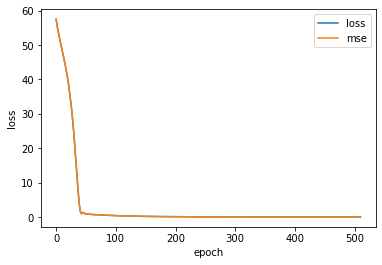

In [9]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 및 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다.

In [10]:
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print(x_predict.shape)

(1, 5)
(1, 5, 1)


In [11]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[8.69702]]
